In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../Pyfiles')
# Pull in the helper files.
from ImageRead import *
from QNN import *


In [2]:
target_o = [1 for i in range(25)]+[0 for i in range(25)]

In [4]:
pathY=r'../images/dataset/Original/galaxy/'
pathN=r'../images/dataset/Original/No-galaxy/'
nameN=''
nameY=''
# a1 = imageResize(callImage(5,pathY,nameY),16)
# a2 = imageResize(callImage(29,pathY,nameY),16)
# # plt.imshow(a1,cmap='gray')
# plt.imshow(a2,cmap='gray')
# plt.imshow(b1,cmap='gray')
# plt.imshow(b2,cmap='gray')
inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

In [5]:
np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()

np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list( imageBinarize(input_combine[i]) for i in idx )

data_target_o=list( target_o[i] for i in idx )

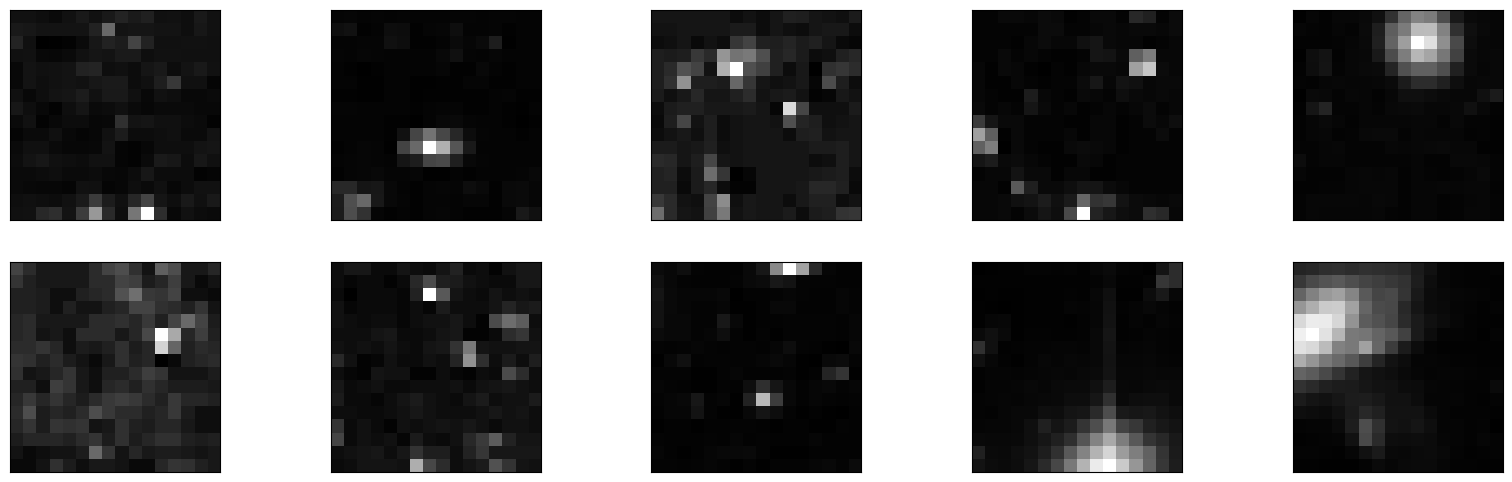

In [6]:
n_samples_show = 5
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show, figsize=(20, 6))

for i in range(n_samples_show):

    axes[0,i].imshow(dataInput[i], cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[1,i].imshow(dataInput[i+5], cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])    


In [7]:
import numpy as np
from qiskit.circuit.parameter import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS, SGD, Adam
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC

# Define the parity function
def parity(x):
    return f"{bin(x)}".count("1") % 2

# Model for LBFGS
np.random.seed(3)

nqubits = 6
num_inputs = 256
qc = QuantumCircuit(nqubits)

# Encoding
param_x = []
for i in range(num_inputs):
    param_x.append(Parameter('x' + str(i)))
for i in range(8):
    param_x.append(np.pi / 2)

# Assuming you have a function `encoding` defined elsewhere
feature_map = encoding(qc, param_x, 22)

# Optimizing circuit PQC
param_y = []
for i in range(nqubits * 2):
    param_y.append(Parameter('θ' + str(i)))

# Assuming you have a function `circuit15` defined elsewhere
ansatz = circuit15(qc, param_y)

# Compose the feature map and ansatz into the quantum circuit
qc.append(feature_map, range(nqubits))
qc.append(ansatz, range(nqubits))

# Use SamplerQNN instead of CircuitQNN
qnn2 = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=2
)

# Initialize weights for the QNN
initial_weights = 0.1 * (2 * np.random.rand(qnn2.num_weights) - 1)


# Learning Rate 0.05

In [30]:
# define optimizer and loss function

model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

In [31]:
from torch import Tensor
# start training

model2.train()    # set model to training mode

# define objective function
def closure():
    optimizer.zero_grad()                                  # initialize gradient
    loss = 0.0                                             # initialize loss    
    for x, y_target in zip(X, y01):                        # evaluate batch loss
        output = model2(Tensor(x)).reshape(1, 2)           # forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()                                        # backward pass
    print(loss.item())                                     # print loss
    return loss

# run optimizer
optimizer.step(closure)
optimizer.step(closure)

35.777549743652344
35.66697692871094
34.570335388183594
33.22208786010742
31.85173797607422
30.984848022460938
30.836833953857422
30.748531341552734
30.67437744140625
30.61083984375
30.556110382080078
30.508686065673828
30.467330932617188
30.431076049804688
30.399106979370117
30.37078094482422
30.34559440612793
30.323108673095703
30.302978515625
30.28489875793457
30.268648147583008
30.25398826599121
30.24076271057129
30.22880744934082
30.218000411987305
30.208215713500977
30.199356079101562
30.19131851196289
30.18404197692871
30.177446365356445
30.171466827392578
30.166038513183594
30.16112518310547
30.156665802001953
30.152629852294922
30.148967742919922
30.145654678344727
30.142642974853516
30.139923095703125
30.137454986572266


tensor(30.2686, grad_fn=<AddBackward0>)

In [15]:
# define optimizer and loss function

model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

In [16]:
from torch import Tensor
# start training

model2.train()    # set model to training mode

# define objective function
def closure():
    optimizer.zero_grad()                                  # initialize gradient
    loss = 0.0                                             # initialize loss    
    for x, y_target in zip(X, y01):                        # evaluate batch loss
        output = model2(Tensor(x)).reshape(1, 2)           # forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()                                        # backward pass
    print(loss.item())                                     # print loss
    return loss

# run optimizer
optimizer.step(closure)
optimizer.step(closure)

35.64811325073242
35.54372024536133
34.583099365234375
33.46548080444336
34.92763137817383
33.943382263183594
33.3530387878418
33.160621643066406
32.918704986572266
32.557430267333984
32.2894172668457
32.128395080566406
32.01044845581055
31.910511016845703
31.814376831054688
31.707338333129883
31.57135009765625
31.401521682739258
31.247360229492188
31.13759994506836
31.060617446899414
30.993940353393555
30.934581756591797
30.878589630126953
30.827341079711914
30.77460289001465
30.718544006347656
30.65656852722168
30.589841842651367
30.522985458374023
30.46346092224121
30.415023803710938
30.37604522705078
30.344024658203125
30.316993713378906
30.29376792907715
30.273433685302734
30.255414962768555
30.239213943481445
30.22450065612793


tensor(31.0606, grad_fn=<AddBackward0>)

In [17]:
# traning model accuracy
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.86


# Learning rate 0.06

In [29]:
# define optimizer and loss function
from torch import Tensor
model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.0006)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.5


In [27]:
from torch import Tensor
# start training

model2.train()    # set model to training mode

# define objective function
def closure():
    optimizer.zero_grad()                                  # initialize gradient
    loss = 0.0                                             # initialize loss    
    for x, y_target in zip(X, y01):                        # evaluate batch loss
        output = model2(Tensor(x)).reshape(1, 2)           # forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()                                        # backward pass
    print(loss.item())                                     # print loss
    return loss

# run optimizer
optimizer.step(closure)
optimizer.step(closure)

35.777549743652344
35.76658248901367
35.66649627685547
35.56280517578125
35.4554328918457
35.34437561035156
35.22959518432617
35.111106872558594
34.98897933959961
34.86327362060547
34.73408508300781
34.6015510559082
34.465850830078125
34.3271598815918
34.18574523925781
34.04186248779297
33.89581298828125
33.747947692871094
33.59864807128906
33.448341369628906
33.297462463378906
33.14649963378906
31.910097122192383
31.8469295501709
31.813581466674805
31.778547286987305
31.74177360534668
31.703874588012695
31.665477752685547
31.6272029876709
31.589582443237305
31.55307388305664
31.517988204956055
31.484527587890625
31.452789306640625
31.422805786132812
31.394527435302734
31.367900848388672
31.34282112121582
31.31919288635254


tensor(33.2975, grad_fn=<AddBackward0>)

In [28]:
# traning model accuracy
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.5


# Learning Rate 0.07

In [21]:
# define optimizer and loss function
from torch import Tensor
model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.07)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.5


In [22]:
from torch import Tensor
# start training

model2.train()    # set model to training mode

# define objective function
def closure():
    optimizer.zero_grad()                                  # initialize gradient
    loss = 0.0                                             # initialize loss    
    for x, y_target in zip(X, y01):                        # evaluate batch loss
        output = model2(Tensor(x)).reshape(1, 2)           # forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()                                        # backward pass
    print(loss.item())                                     # print loss
    return loss

# run optimizer
optimizer.step(closure)
optimizer.step(closure)

35.64811325073242
35.50145721435547
34.130165100097656
32.58714294433594
30.83588981628418
30.67334747314453
30.545894622802734
30.412790298461914
30.290376663208008
30.187480926513672
30.103849411010742
30.03590965270996
29.980018615722656
29.933347702026367
29.893814086914062
29.859893798828125
29.83043670654297
29.80458641052246
29.781648635864258
29.761093139648438
29.742490768432617
29.72548484802246
29.709779739379883
29.695125579833984
29.68130874633789
29.668176651000977
29.655567169189453
29.64336395263672
29.63149642944336
29.619918823242188
29.608671188354492
29.597822189331055
29.587520599365234
29.577953338623047
29.56929588317871
29.561634063720703
29.554969787597656
29.54922103881836
29.544267654418945
29.53997039794922


tensor(29.7425, grad_fn=<AddBackward0>)

In [23]:
# traning model accuracy
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.86


# TestModel2

In [24]:
target_o = [1 for i in range(25)]+[0 for i in range(25)]

pathY=r'../dataset/Original/galaxy1/'
pathN=r'../dataset/Original/no-galaxy1/'
nameN=''
nameY=''
inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()

np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list( imageBinarize(input_combine[i]) for i in idx )

data_target_o=list( target_o[i] for i in idx )

Xtest= [normlaizeData(dataInput[i].flatten()) for i in range(25)]
y01test= [data_target_o[i] for i in range(25)]

Xtest1= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01test1= [data_target_o[i] for i in range(50)]

y_predict = []
for x in Xtest:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy25data:', sum(y_predict == np.array(y01test))/len(np.array(y01test)))

y_predict1 = []
for x in Xtest1:
    output = model2(Tensor(x))
    y_predict1 += [np.argmax(output.detach().numpy())]

print('Accuracy50data:', sum(y_predict1 == np.array(y01test1))/len(np.array(y01test1)))

Accuracy25data: 0.8
Accuracy50data: 0.74
